*Eduardus Tjitrahardja | @edutjie | 2022*

# Predicting Number from Your Own Handwriting

## Import Libraries

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from helper import NeuralNetwork, image_rescaller
import dill, glob

## Load Trained Model

In [93]:
nn = dill.load(open('model/nn_trained.pkl', 'rb'))

## Load Own Image Dataset

In [94]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob("data/images/my_own_*.png"):

    # use the filename to set the correct label
    label = int(image_file_name.split("_")[2][0])

    # load image data from png files into an array
    print("loading ... ", image_file_name)
    img_data = image_rescaller(image_file_name)

    print(np.min(img_data))
    print(np.max(img_data))

    # append label and image data  to test data set
    record = np.append(label, img_data)
    our_own_dataset.append(record)


loading ...  data/images\my_own_2.png
0.01
1.0
loading ...  data/images\my_own_3.png
0.01
1.0
loading ...  data/images\my_own_3_1.png
0.01
1.0
loading ...  data/images\my_own_4.png
0.01
0.93011767
loading ...  data/images\my_own_5.png
0.01
0.86800003
loading ...  data/images\my_own_6.png
0.01
1.0
loading ...  data/images\my_own_6_1.png
0.14588237
0.77482355
loading ...  data/images\my_own_7.png
0.01
0.6750664
loading ...  data/images\my_own_7_1.png
0.01
0.7984166
loading ...  data/images\my_own_8.png
0.01
0.81006366
loading ...  data/images\my_own_9.png
0.01
0.77672595


## Plot Own Image Dataset

In [95]:
item = 0

In [96]:
def plot_handwriting(data):
    image_array = np.asfarray(data[1:]).reshape((28, 28))
    plt.imshow(image_array, cmap="Greys", interpolation="None")

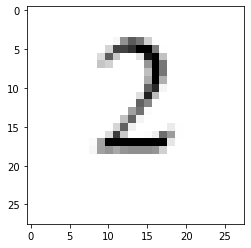

In [97]:
plot_handwriting(our_own_dataset[item])

## Predict

In [98]:
expected_output = our_own_dataset[item][0]
expected_output

2.0

In [99]:
inputs = our_own_dataset[item][1:]

# predict
outputs = nn.query(inputs)
outputs

array([[1.53897578e-03],
       [1.28747232e-02],
       [8.68838716e-01],
       [5.53356054e-02],
       [1.68322793e-02],
       [4.36872405e-03],
       [2.89136713e-05],
       [1.50939311e-02],
       [5.25431678e-06],
       [2.58095306e-03]])

Expected Output: '2.0', Actual Output: '2'
Match!


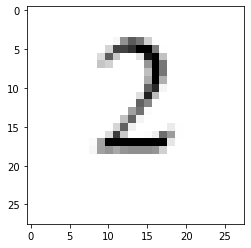

In [100]:
actual_output = np.argmax(outputs)
print(f"Expected Output: '{expected_output}', Actual Output: '{actual_output}'")
print("Match!") if expected_output == actual_output else print("No Match!")
plot_handwriting(our_own_dataset[item])

In [101]:
def compare(item):
    expected_output = our_own_dataset[item][0]
    inputs = our_own_dataset[item][1:]
    
    # predict
    outputs = nn.query(inputs)
    print(outputs)
    actual_output = np.argmax(outputs)
    
    print(f"Expected Output: '{expected_output}', Actual Output: '{actual_output}'")
    print("Match!") if expected_output == actual_output else print("No Match!")
    plot_handwriting(our_own_dataset[item])

[[8.20840210e-03]
 [3.24249771e-03]
 [1.98440253e-03]
 [9.17714803e-01]
 [7.44775095e-04]
 [6.37468358e-02]
 [2.89384386e-03]
 [2.99508019e-03]
 [4.35492275e-04]
 [6.26758905e-04]]
Expected Output: '3.0', Actual Output: '3'
Match!


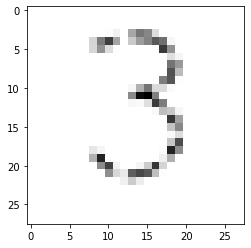

In [102]:
compare(1)

[[6.65891508e-04]
 [7.34971106e-03]
 [3.84756504e-03]
 [9.74670494e-01]
 [1.35894420e-03]
 [1.11384390e-03]
 [2.86756405e-02]
 [6.25465840e-03]
 [8.10102143e-02]
 [1.35635802e-02]]
Expected Output: '3.0', Actual Output: '3'
Match!


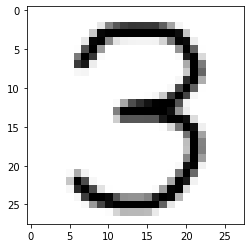

In [103]:
compare(2)

[[9.04909622e-04]
 [1.08164744e-03]
 [1.72024764e-01]
 [1.31930926e-03]
 [9.62175958e-01]
 [2.78464320e-02]
 [2.71672088e-02]
 [1.93871948e-03]
 [5.91989627e-04]
 [6.60652527e-04]]
Expected Output: '4.0', Actual Output: '4'
Match!


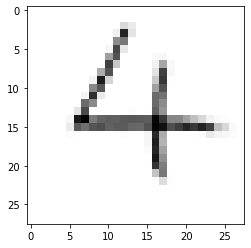

In [104]:
compare(3)

[[2.30257330e-02]
 [1.31738333e-03]
 [8.83794493e-04]
 [1.15446857e-02]
 [3.46879945e-04]
 [7.37666614e-01]
 [4.46617166e-03]
 [1.63674013e-02]
 [3.96484216e-05]
 [4.88666811e-03]]
Expected Output: '5.0', Actual Output: '5'
Match!


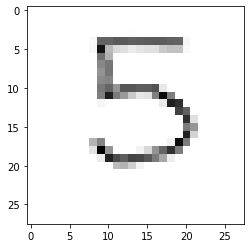

In [105]:
compare(4)

[[6.05924398e-03]
 [3.67492249e-02]
 [4.72810757e-04]
 [3.11757886e-02]
 [7.34264252e-03]
 [3.25955813e-02]
 [5.14006162e-01]
 [2.40948638e-02]
 [4.81210053e-03]
 [7.00831142e-03]]
Expected Output: '6.0', Actual Output: '6'
Match!


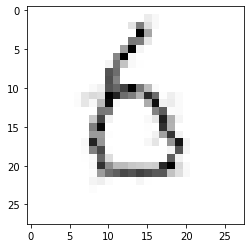

In [106]:
compare(5)

[[0.08314984]
 [0.00739353]
 [0.05918249]
 [0.0500383 ]
 [0.0956382 ]
 [0.11816296]
 [0.0578345 ]
 [0.10828988]
 [0.75561879]
 [0.6802518 ]]
Expected Output: '6.0', Actual Output: '8'
No Match!


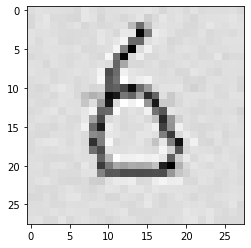

In [107]:
compare(6)

We can see that the neural network **recognised all of the images** we created, including the 
deliberately damaged “3”. Only the **“6” with added noise failed**.

## Additional Testing

[[2.39409260e-04]
 [1.05242128e-03]
 [4.01971329e-02]
 [1.09899779e-02]
 [2.02877166e-04]
 [2.72544983e-03]
 [3.24806690e-05]
 [8.43010002e-01]
 [8.25422110e-07]
 [4.89932421e-03]]
Expected Output: '7.0', Actual Output: '7'
Match!


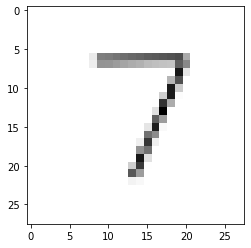

In [108]:
compare(7)

[[1.00381849e-04]
 [2.03252415e-03]
 [3.60794036e-03]
 [3.60598292e-03]
 [4.37412256e-02]
 [2.02682270e-03]
 [9.72198165e-04]
 [5.16409573e-01]
 [8.35972266e-07]
 [2.96234909e-03]]
Expected Output: '7.0', Actual Output: '7'
Match!


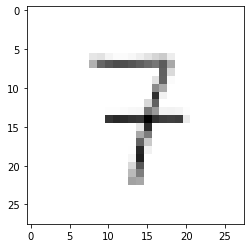

In [109]:
compare(8)

[[0.00206983]
 [0.00243188]
 [0.01284643]
 [0.00037077]
 [0.00138382]
 [0.02743418]
 [0.01238941]
 [0.00189087]
 [0.05932688]
 [0.0034067 ]]
Expected Output: '8.0', Actual Output: '8'
Match!


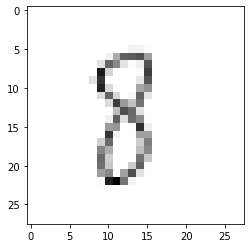

In [110]:
compare(9)

[[0.00411848]
 [0.00058493]
 [0.00535231]
 [0.03988873]
 [0.00943741]
 [0.02284338]
 [0.00285091]
 [0.0065172 ]
 [0.00169866]
 [0.30765235]]
Expected Output: '9.0', Actual Output: '9'
Match!


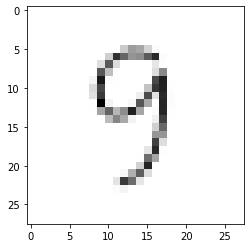

In [111]:
compare(10)

[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]


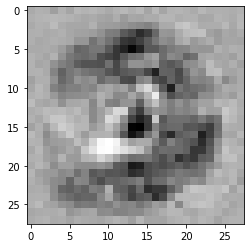

In [500]:
input = 3
output_nodes = 10 # because 0-9
targets = np.zeros(output_nodes) + 0.01
targets[input] = 0.99
print(targets)
image_data = nn.back_query(targets) # back querying
plt.imshow(image_data.reshape(28,28),
           cmap='Greys',
           interpolation='None') # plot the image
plt.show()

In [501]:
inputs = our_own_dataset[2][1:]

# predict
outputs = nn.query(inputs)
actual_output = np.argmax(outputs)
print(actual_output)

3
